In [477]:
import numpy as np
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay

In [478]:
dataset = datasets.make_classification(n_samples =100, n_features=2, n_redundant = 0)

In [479]:
X, y = dataset
y = y.reshape(-1,1)
X.shape, y.shape

((100, 2), (100, 1))

In [492]:
class LogisticRegression:
    
    def __init__(self, lr, n_features):
        self.lr = lr
        self.w = np.zeros((n_features,1))
        self.b = np.zeros((1, 1))
        # X = > M, N # M, N + 1
        # Y = > M, 1
        # W = > N, 1 # N+1, 1
    
    def loss(self, X, y_hat, y):
        m = X.shape[0]
        return  (-1/m) * np.sum(y * np.log(y_hat) + (1-y)*np.log(1-y_hat))
    
    def sigmoid(self, Z):
        return (1/(1 + np.exp(-Z)))
    
    def gradient_w(self, X, y_hat, y):

        return 1/X.shape[0] * X.T @ (y_hat - y)
    
    def gradient_b(self, X, y_hat, y):
        return 1/X.shape[0] * np.sum(y_hat - y)
    
    def predict(self, X):
        return self.sigmoid(X @ self.w + self.b)
    
    def predict_grid(self, X):
        print(X.shape)
        print(self.w.shape)
        print(self.w[1:,:].shape)
        return self.sigmoid(X @ self.w[1:, :] + self.w[0,:])
    
    def fit(self, X, y):

        predict = self.predict(X)
        loss = self.loss(X, predict, y)
        self.w = self.w - self.lr * self.gradient_w(X, predict, y)
        self.b = self.b - self.lr * self.gradient_b(X, predict, y)
        print("loss is ", loss.mean())
            
        
        

In [493]:
#X = np.hstack( [ np.ones((X.shape[0], 1)), X]   )
model = LogisticRegression(lr=1e-1, n_features = X.shape[1])

In [494]:
import time
from matplotlib import interactive
interactive(True)
epochs = 100
for i in range(epochs):
    model.fit(X, y)


loss is  0.6931471805599453
loss is  0.6703502370478204
loss is  0.6492569816667526
loss is  0.6297280942538303
loss is  0.6116304464607489
loss is  0.5948388778290084
loss is  0.5792372178191448
loss is  0.5647187071649635
loss is  0.5511859738408285
loss is  0.5385507019730743
loss is  0.5267331067140802
loss is  0.5156613014785704
loss is  0.5052706199300667
loss is  0.49550293534807405
loss is  0.48630600476241925
loss is  0.4776328540551119
loss is  0.4694412123705862
loss is  0.4616929988805497
loss is  0.45435386154519947
loss is  0.44739276545091067
loss is  0.4407816271661414
loss is  0.4344949910334974
loss is  0.4285097431865086
loss is  0.42280485919187316
loss is  0.4173611814682678
loss is  0.4121612229530021
loss is  0.40718899383406204
loss is  0.40242984851044517
loss is  0.39787035027234907
loss is  0.3934981514963644
loss is  0.38930188742563315
loss is  0.38527108185025505
loss is  0.3813960632200076
loss is  0.3776678899116781
loss is  0.37407828353935385
loss is  

# Decision boundary

In [495]:
import matplotlib.pyplot as plt
%matplotlib inline

In [496]:
def plot_decision(classifier, X, threshold):
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    grid = np.hstack((r1,r2))
    
    yhat = model.predict(grid)
    yhat[yhat >= threshold] = 1
    yhat[yhat < threshold] = 0
    
    zz = yhat.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
        
def plot_decision_bias(classifier, X, threshold):
    min1, max1 = X[:, 1].min()-1, X[:, 1].max()+1
    min2, max2 = X[:, 2].min()-1, X[:, 2].max()+1
    
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    grid = np.hstack((r1,r2))
    
    yhat = model.predict_grid(grid)
    yhat[yhat >= threshold] = 1
    yhat[yhat < threshold] = 0
    
    zz = yhat.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap='Paired')
    # create scatter plot for samples from each class
    for class_value in range(2):
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        # create scatter of these samples
        plt.scatter(X[row_ix, 1], X[row_ix, 2], cmap='Paired')
        plt.scatter(0,0, s=20)

/var/folders/6v/9gb458t90k7dvc1hvl02dr4w0000gn/T/ipykernel_1945/1308054796.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


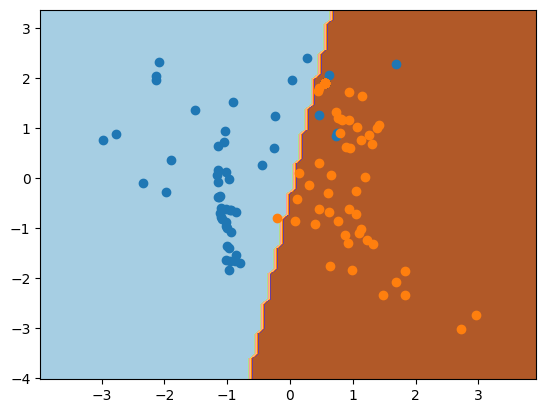

In [497]:
plot_decision(model, X, 0.5)

In [461]:
grid.shape

(4736, 2)

In [288]:
model.w.shape

(3, 1)

In [289]:
X.shape

(100, 3)